# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [47]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [48]:
#Your code here
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [50]:
df['id'].value_counts()

750053    2
389447    2
283040    2
918794    2
208714    2
         ..
467818    1
629924    1
820336    1
424916    1
461199    1
Name: id, Length: 6328, dtype: int64

In [51]:
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [52]:
new = df['group'].value_counts()
new

control       4264
experiment    3924
Name: group, dtype: int64

In [53]:
control_df = df[df['group'] == 'control']
experimental_df = df[df['group'] == 'experiment']


In [54]:
# Find the number of clickers who did not view
cids = set(df[df.action=='click']['id'].unique())
vids = set(df[df.action=='view']['id'].unique())
print("Number of viewers: {} \tNumber of clickers: {}".format(len(vids), len(cids)))
print("Number of Viewers who didn't click: {}".format(len(vids-cids)))
print("Number of Clickers who didn't view: {}".format(len(cids-vids)))

Number of viewers: 6328 	Number of clickers: 1860
Number of Viewers who didn't click: 4468
Number of Clickers who didn't view: 0


<AxesSubplot: ylabel='Density'>

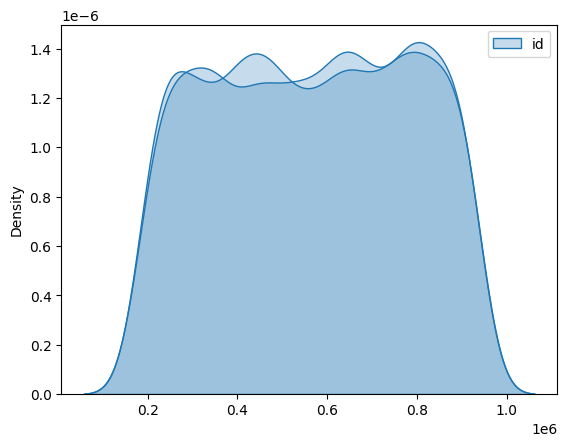

In [55]:
# sns.boxplot(x='group',y=df['group'].value_counts(), data=df)
sns.kdeplot(control_df, label='control', fill=True)
sns.kdeplot(experimental_df,label='expriment', fill=True)

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [56]:
#Your code here
df.groupby('group')['action'].value_counts()

group       action
control     view      3332
            click      932
experiment  view      2996
            click      928
Name: action, dtype: int64

In [57]:
count_views = pd.crosstab(df['group'], df['action']).values 
count_views

array([[ 932, 3332],
       [ 928, 2996]], dtype=int64)

In [58]:
clickers_rate_experiment = 928/ (2996)
clickers_rate_control = 932/(3332)
print(clickers_rate_experiment, clickers_rate_control)

0.3097463284379172 0.2797118847539016


In [59]:
null_hypothesis ="The experimental page is not performing good."
alternate_hypothesis = "The experimental page is performing good."

In [60]:
# from scipy.stats import chi2_contingency
# chi2_statistic, p_value, dof, expected_values = chi2_contingency(count_views, correction=False)
# print(chi2_statistic, p_value)

3.7375327967422627 0.05320294852289552


In [64]:
import statsmodels.api as sm  
z_score, p_value = sm.stats.proportions_ztest([932, 928], [3332, 2996], alternative='larger')
print(1- p_value)


0.004415037788297882


## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [62]:
#Your code here
control_rate = control.click.mean()
expected_experiment_clicks_under_null = control_rate * len(experiment)
print(expected_experiment_clicks_under_null)

NameError: name 'control' is not defined

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [ ]:
#Your code here

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [ ]:
#Your code here

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

In [ ]:
# The experimental page appears to be a more effective design.

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.